# Pathlight Exercise

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from matplotlib.gridspec import GridSpec

#### Reading Data

In [2]:
# path where data lies
root = 'C:/Data/Pathlight/'

# reading data
tickets = pd.read_csv(root+ 'tickets - tickets.csv')
users = pd.read_csv(root+ 'users - users.csv')

Only and users and tickets data will be required to build a metric we need as ticket audits and events contains all the changes related to tickets which is not required now.

### Data Understanding

#### Tickets

Tickets data contains higher level information about the ticket i.e. when it was created, when it was resolved, who was assigned to it, who submitted the ticket request, etc.

Ticket data has total 3318 unique tickets

In [3]:
# checking top 5 rows of ticket data
tickets.head()

,assignee_id,created_at,custom_fields,due_at,generated_timestamp,id,is_public,priority,requester_id,status,submitter_id,updated_at,via__channel
0,10054.0,2020-11-06 12:43:49,NaN,NaN,1605578559,217081,t,urgent,20001,closed,20001,2020-11-17 2:02:39,email
1,10025.0,2020-11-17 17:31:57,NaN,NaN,1606755706,219304,t,normal,20002,closed,20002,2020-11-30 17:01:46,email
2,10166.0,2020-11-13 15:22:26,NaN,NaN,1605628894,218594,NaN,normal,20003,closed,20003,2020-11-17 16:01:34,chat
3,10095.0,2020-11-17 20:24:56,NaN,NaN,1605826887,219392,NaN,low,20004,closed,20004,2020-11-19 23:01:27,chat
4,10095.0,2020-11-05 21:13:33,NaN,NaN,1605826902,216976,t,low,20005,closed,20005,2020-11-19 23:01:42,chat


In [4]:
# checking total unique ticket ids 
tickets.id.nunique()

3318

In [5]:
# checking number of rows and columns of tickets data
tickets.shape

(3318, 13)

In [6]:
# Checking null values
tickets.isnull().sum()

assignee_id              98
created_at                0
custom_fields          3318
due_at                 3318
generated_timestamp       0
id                        0
is_public              1011
priority                 61
requester_id              0
status                    0
submitter_id              0
updated_at                0
via__channel              0
dtype: int64

So, there are total 98 tickets which have not been assigned to anyone. Checking the status of them.

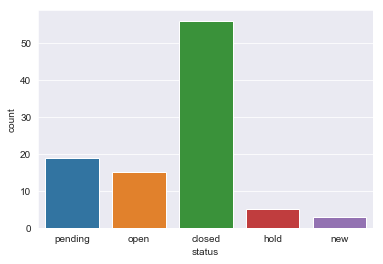

In [7]:
sns.countplot(tickets.status[tickets.assignee_id.isnull() == True])

#### Users

There are total 50 agents, 9 admins, 5 team leads, 2 managers and 1 director.

In [8]:
# checking top 5 rows of users data
users.head()

,id,role,role_type,first_name,last_name,email,manager_email
0,10145,admin,NaN,Casey,Andersen,caseyandersen@pathlight.com,donnaho@pathlight.com
1,10204,team_lead,NaN,Miranda,Anderson,mirandaanderson@pathlight.com,matthewreyes@pathlight.com
2,10025,agent,NaN,Penny,Ayers,pennyayers@pathlight.com,brittanylogan@pathlight.com
3,10206,team_lead,NaN,Matthew,Ayers,matthewayers@pathlight.com,jeremyrobertson@pathlight.com
4,10054,agent,NaN,Todd,Barnes,toddbarnes@pathlight.com,davidbrown@pathlight.com


In [9]:
# checking total unique users 
users.id.nunique()

67

In [10]:
# Checking null values
users.isnull().sum()

id                0
role              0
role_type        66
first_name        0
last_name         0
email             0
manager_email     1
dtype: int64

In [11]:
# total different types of user
users.role.value_counts()

agent        50
admin         9
team_lead     5
manager       2
director      1
Name: role, dtype: int64

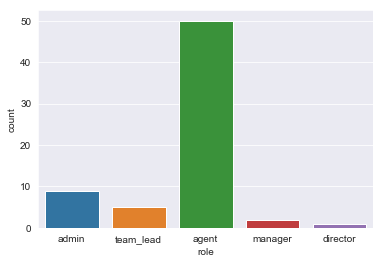

In [12]:
# Visualizing different types of user
sns.countplot(users.role)

### Data Set Preparation

**Steps:**

    (1) Remove unnecessary columns from tickets and users
    (2) The tickets data contains assignee_id that shows which agent or admin a ticket is currently assigned to. Based on that I would merge a users data.
    (3) Users data contains information of all users and their managers' email id. Based on their managers' email id, I would find out their immediate supervisior as well.
    
    This way I will have information of a ticket, its assignee, team-lead of an assignee and manager of a team-lead.
    

In [13]:
# dropping unnecessary data from tickets

tickets_new = tickets.drop(['custom_fields', 'due_at', 'generated_timestamp', 'is_public', 'requester_id', \
                           'submitter_id', 'priority', 'via__channel'], axis = 1)

# merging first and last name of users
users['name'] = users.first_name + ' ' + users.last_name
# dropping unnecessary data from users
users_new = users.drop(['role_type', 'first_name', 'last_name'], axis = 1)

In [14]:
# merging tickets and users and changing column names
df = tickets_new.merge(users_new, left_on='assignee_id', right_on='id', how = 'left')
df = df.drop(['id_y','role'], axis = 1)
df = df.rename(columns = {'id_x':'ticket_id', 'name':'assignee', 'email':'assignee_email',\
                          'manager_email':'assignee_manager_email'})
df.head()

,assignee_id,created_at,ticket_id,status,updated_at,assignee_email,assignee_manager_email,assignee
0,10054.0,2020-11-06 12:43:49,217081,closed,2020-11-17 2:02:39,toddbarnes@pathlight.com,davidbrown@pathlight.com,Todd Barnes
1,10025.0,2020-11-17 17:31:57,219304,closed,2020-11-30 17:01:46,pennyayers@pathlight.com,brittanylogan@pathlight.com,Penny Ayers
2,10166.0,2020-11-13 15:22:26,218594,closed,2020-11-17 16:01:34,cherylprice@pathlight.com,matthewayers@pathlight.com,Cheryl Price
3,10095.0,2020-11-17 20:24:56,219392,closed,2020-11-19 23:01:27,carolynmoore@pathlight.com,mirandaanderson@pathlight.com,Carolyn Moore
4,10095.0,2020-11-05 21:13:33,216976,closed,2020-11-19 23:01:42,carolynmoore@pathlight.com,mirandaanderson@pathlight.com,Carolyn Moore


In [15]:
# merging users based on assignee_manager_email to find team leads

df = df.merge(users_new, left_on='assignee_manager_email', right_on='email', how = 'left')
df = df.drop(['id', 'role'], axis = 1)
df = df.rename(columns = {'name':'team_lead', 'email':'team_lead_email',\
                          'manager_email':'team_lead_manager_email'})
df.head()

,assignee_id,created_at,ticket_id,status,updated_at,assignee_email,assignee_manager_email,assignee,team_lead_email,team_lead_manager_email,team_lead
0,10054.0,2020-11-06 12:43:49,217081,closed,2020-11-17 2:02:39,toddbarnes@pathlight.com,davidbrown@pathlight.com,Todd Barnes,davidbrown@pathlight.com,matthewreyes@pathlight.com,David Brown
1,10025.0,2020-11-17 17:31:57,219304,closed,2020-11-30 17:01:46,pennyayers@pathlight.com,brittanylogan@pathlight.com,Penny Ayers,brittanylogan@pathlight.com,matthewreyes@pathlight.com,Brittany Logan
2,10166.0,2020-11-13 15:22:26,218594,closed,2020-11-17 16:01:34,cherylprice@pathlight.com,matthewayers@pathlight.com,Cheryl Price,matthewayers@pathlight.com,jeremyrobertson@pathlight.com,Matthew Ayers
3,10095.0,2020-11-17 20:24:56,219392,closed,2020-11-19 23:01:27,carolynmoore@pathlight.com,mirandaanderson@pathlight.com,Carolyn Moore,mirandaanderson@pathlight.com,matthewreyes@pathlight.com,Miranda Anderson
4,10095.0,2020-11-05 21:13:33,216976,closed,2020-11-19 23:01:42,carolynmoore@pathlight.com,mirandaanderson@pathlight.com,Carolyn Moore,mirandaanderson@pathlight.com,matthewreyes@pathlight.com,Miranda Anderson


In [16]:
# again merging users based on team_lead_manager_email to find managers

df = df.merge(users_new, left_on='team_lead_manager_email', right_on='email', how = 'left')
df = df.drop(['id', 'role'], axis = 1)
df = df.rename(columns = {'name':'manager', 'email':'manager_email',\
                          'manager_email':'director_email'})
df.head()

,assignee_id,created_at,ticket_id,status,updated_at,assignee_email,assignee_manager_email,assignee,team_lead_email,team_lead_manager_email,team_lead,manager_email,director_email,manager
0,10054.0,2020-11-06 12:43:49,217081,closed,2020-11-17 2:02:39,toddbarnes@pathlight.com,davidbrown@pathlight.com,Todd Barnes,davidbrown@pathlight.com,matthewreyes@pathlight.com,David Brown,matthewreyes@pathlight.com,juliasmith@pathlight.com,Matthew Reyes
1,10025.0,2020-11-17 17:31:57,219304,closed,2020-11-30 17:01:46,pennyayers@pathlight.com,brittanylogan@pathlight.com,Penny Ayers,brittanylogan@pathlight.com,matthewreyes@pathlight.com,Brittany Logan,matthewreyes@pathlight.com,juliasmith@pathlight.com,Matthew Reyes
2,10166.0,2020-11-13 15:22:26,218594,closed,2020-11-17 16:01:34,cherylprice@pathlight.com,matthewayers@pathlight.com,Cheryl Price,matthewayers@pathlight.com,jeremyrobertson@pathlight.com,Matthew Ayers,jeremyrobertson@pathlight.com,juliasmith@pathlight.com,Jeremy Robertson
3,10095.0,2020-11-17 20:24:56,219392,closed,2020-11-19 23:01:27,carolynmoore@pathlight.com,mirandaanderson@pathlight.com,Carolyn Moore,mirandaanderson@pathlight.com,matthewreyes@pathlight.com,Miranda Anderson,matthewreyes@pathlight.com,juliasmith@pathlight.com,Matthew Reyes
4,10095.0,2020-11-05 21:13:33,216976,closed,2020-11-19 23:01:42,carolynmoore@pathlight.com,mirandaanderson@pathlight.com,Carolyn Moore,mirandaanderson@pathlight.com,matthewreyes@pathlight.com,Miranda Anderson,matthewreyes@pathlight.com,juliasmith@pathlight.com,Matthew Reyes


In [17]:
# keeping necessary columns

df_final = df[['assignee_id', 'created_at', 'ticket_id', 'status', 'updated_at', 'assignee', 'team_lead', 'manager']]
df_final.head()

,assignee_id,created_at,ticket_id,status,updated_at,assignee,team_lead,manager
0,10054.0,2020-11-06 12:43:49,217081,closed,2020-11-17 2:02:39,Todd Barnes,David Brown,Matthew Reyes
1,10025.0,2020-11-17 17:31:57,219304,closed,2020-11-30 17:01:46,Penny Ayers,Brittany Logan,Matthew Reyes
2,10166.0,2020-11-13 15:22:26,218594,closed,2020-11-17 16:01:34,Cheryl Price,Matthew Ayers,Jeremy Robertson
3,10095.0,2020-11-17 20:24:56,219392,closed,2020-11-19 23:01:27,Carolyn Moore,Miranda Anderson,Matthew Reyes
4,10095.0,2020-11-05 21:13:33,216976,closed,2020-11-19 23:01:42,Carolyn Moore,Miranda Anderson,Matthew Reyes


Sweet!

### Metric Definition

**Total Tickets worked in a week:** This is total chats or tickets that went from no or NULL assignee to being assigned to the agent, whether or not the agent currently owns that ticket. 


**Steps:**
    
    (1) Find total tickets that were created during the week
    (2) Remove those tickets who have not been assigned yet
    (3) Find out total tickets worked in a week
    (4) Based on admin and agent id, find out total tickets worked by each individual
    (5) Based on team-lead id, find out total tickets worked by each team
    (6) Based on manager id, find out total tickets worked by all teams of a same manager  

In [18]:
def total_tickets_worked_in_a_week(start_date, end_date, data):
    
    # Date and time format
    data.created_at = pd.to_datetime(data.created_at).dt.date.astype(str)
    
    # Keeping those tickets who were created during this week
    data = data[(data.created_at >= start_date) & (data.created_at <= end_date)]
    
    # Removing those tickets who were not assigned yet
    data = data[data.assignee_id.isnull() == False]
    
    print('----------Total Tickets Worked from ', start_date, ' to ', end_date, '----------')
    print('')
    print('Total tickets worked: ', data.shape[0])
    print('')
    print('Total tickets worked by teams under managers:')
    
    temp_df2 = data.groupby('manager')['ticket_id'].count().reset_index().sort_values('ticket_id', ascending = False).\
         rename(columns = {'ticket_id':'total_ticket_worked'}).reset_index(drop = True)
    print(temp_df2)
    print('')
    print('')
    print('Total tickets worked by agents or admins under team leads:')
    
    temp_df1 = data.groupby('team_lead')['ticket_id'].count().reset_index().sort_values('ticket_id', ascending = False).\
         rename(columns = {'ticket_id':'total_ticket_worked'}).reset_index(drop = True)
    
    print(temp_df1)
    print('')
    print('')
    print('Total tickets worked by agents or admins:')
    
    temp_df = data.groupby('assignee')['ticket_id'].count().reset_index().sort_values('ticket_id', ascending = False).\
         rename(columns = {'ticket_id':'total_ticket_worked'}).reset_index(drop = True)
    
    print(temp_df)
    
    fig = plt.figure(figsize = (20, 11))
    
    gs=GridSpec(2,2)

    ax1=fig.add_subplot(gs[:,0])
    ax2=fig.add_subplot(gs[0,1])
    ax3=fig.add_subplot(gs[1,1]) 
    
    sns.countplot(y= data.assignee, hue = data.team_lead, dodge=False, ax = ax1,\
                  order = data.assignee.value_counts().index)
    sns.countplot(x = data.team_lead, hue = data.manager, dodge=False, ax = ax2,\
                 order = data.team_lead.value_counts().index)
    sns.countplot(x = data.manager, ax = ax3)

----------Total Tickets Worked from  2020-11-16  to  2020-11-20 ----------

Total tickets worked:  1465

Total tickets worked by teams under managers:
            manager  total_ticket_worked
0  Jeremy Robertson                  749
1     Matthew Reyes                  716


Total tickets worked by agents or admins under team leads:
          team_lead  total_ticket_worked
0          Donna Ho                  398
1     Matthew Ayers                  351
2    Brittany Logan                  261
3  Miranda Anderson                  242
4       David Brown                  213


Total tickets worked by agents or admins:
              assignee  total_ticket_worked
0           Kerry Rice                  101
1          Todd Barnes                   90
2       Sandra Kaufman                   88
3          Penny Ayers                   86
4       Richard Haynes                   80
5         Kathy Galvan                   78
6      Eugene Martinez                   74
7        Michael Smith 

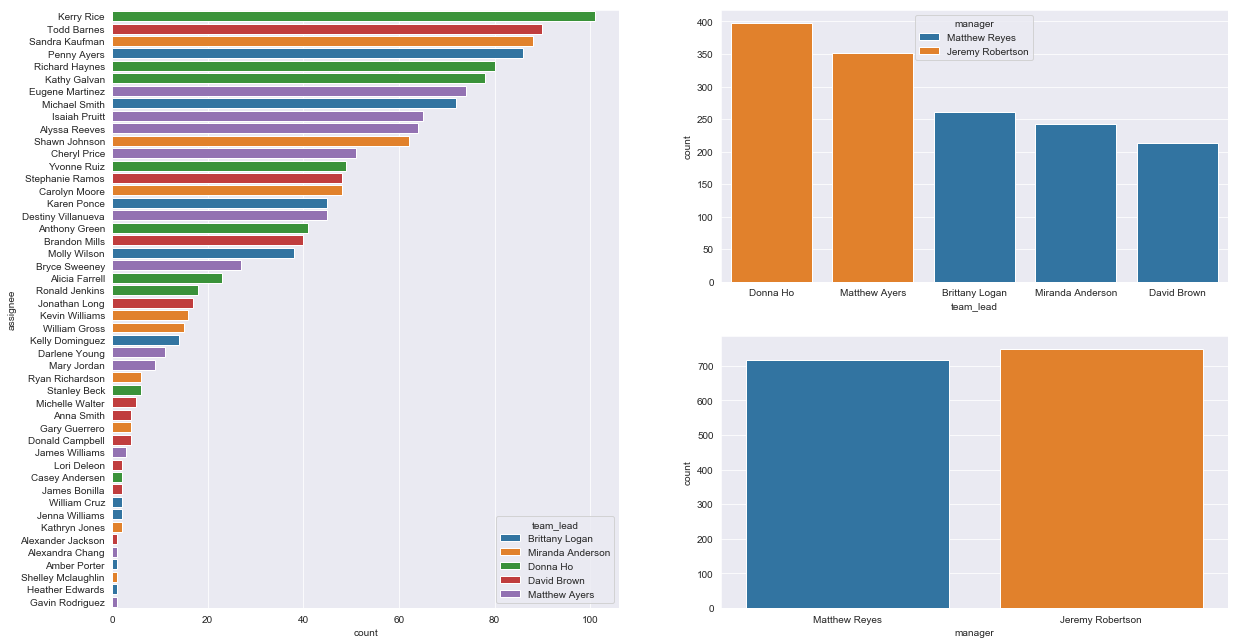

In [19]:
total_tickets_worked_in_a_week(start_date = '2020-11-16', end_date = '2020-11-20', data = df_final)